## Nama : Azzahra Fahriza
## NIM : 2102296

Saya memilih dataset kepadatan penduduk karena sepertinya lebih mudah di pahami oleh saya
##### rencana:

pertama, saya akan menggabungkan dulu dataset pmi dan kepadatan penduduk

kedua, saya akan mengubah tipe data provinsi menjadi category, dan tipe data kepadatan penduduk menjadi int

ketiga, saya akan mengubah yang kepadatan penduduk menjadi 4 kelas (< 150: rendah, 200-300 : sedang, 300-500: tinggi, >500:sangat tinggi)

keempat, membuat EDA

kemudian di klasifikasi mengambil 70% data untuk datatraining, dan 10% unutk data validasi

hasilnya ternyata tidak sesuai dengan rencana

In [1]:
# Pertama-tama import data yang ada di excel
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import joblib
import pickle
# from sklearn.externals import joblib

C:\Users\Azzahra Fahriza\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("C:\\Users\\Azzahra Fahriza\\Documents\\SEMESTER 3\\Data Mining\\uas\\dataset\\kepadatan_penduduk.csv")
df1 = pd.read_csv("C:\\Users\\Azzahra Fahriza\\Documents\\SEMESTER 3\\Data Mining\\uas\\dataset\\pmi.csv")

In [3]:
# menggabungkan 2 file cvs menjadi 1 pada df2
df2=pd.merge(df1,df, how='left')

In [4]:
df2.describe()

,tahun
count,442.000000
mean,2016.000000
std,3.745897
min,2010.000000
25%,2013.000000
50%,2016.000000
75%,2019.000000
max,2022.000000


In [5]:
df2.head(10)

,prov,tahun,kategori_pmi,kepadatan_penduduk
0,ACEH,2022,TINGGI,NaN
1,SUMATERA UTARA,2022,TINGGI,NaN
2,SUMATERA BARAT,2022,TINGGI,NaN
3,RIAU,2022,TINGGI,NaN
4,JAMBI,2022,TINGGI,NaN
5,SUMATERA SELATAN,2022,TINGGI,NaN
6,BENGKULU,2022,TINGGI,NaN
7,LAMPUNG,2022,TINGGI,NaN
8,KEP. BANGKA BELITUNG,2022,TINGGI,NaN
9,KEP. RIAU,2022,TINGGI,NaN


In [6]:
df.isnull().sum()
print("=================================================")
df1.isnull().sum()
print("=================================================")
df2.isnull().sum()

prov                    0
tahun                   0
kategori_pmi            0
kepadatan_penduduk    170
dtype: int64

In [7]:
df["prov"]=df["prov"].astype('category')
df1["prov"]=df1["prov"].astype('category')
df2["prov"]=df2["prov"].astype('category')
# df["kepadatan_penduduk"] = df["kepadatan_penduduk"].astype('int')
# df = df.astype({'kepadatan_penduduk':'int'})
# df["kepadatan_penduduk"] = df["kepadatan_penduduk"].astype(object).astype(float)

In [8]:
df2["prov"]=df2["prov"].astype('category')
df2["kategori_pmi"]=df2["kategori_pmi"].astype('category')
df2["kepadatan_penduduk"]=df2["kepadatan_penduduk"].astype('category')

In [9]:
df.info()
print("=================================================")
df1.info()
print("=================================================")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   prov                280 non-null    category
 1   tahun               280 non-null    int64   
 2   kepadatan_penduduk  280 non-null    object  
dtypes: category(1), int64(1), object(1)
memory usage: 6.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   prov          442 non-null    category
 1   tahun         442 non-null    int64   
 2   kategori_pmi  442 non-null    object  
dtypes: category(1), int64(1), object(1)
memory usage: 8.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -

In [10]:
df2 = df2.dropna()

In [11]:
# mengubah angka dari kepadatan penduduk menjadi kategori (sedang, padat, sangat padat)????

<AxesSubplot:xlabel='tahun', ylabel='count'>

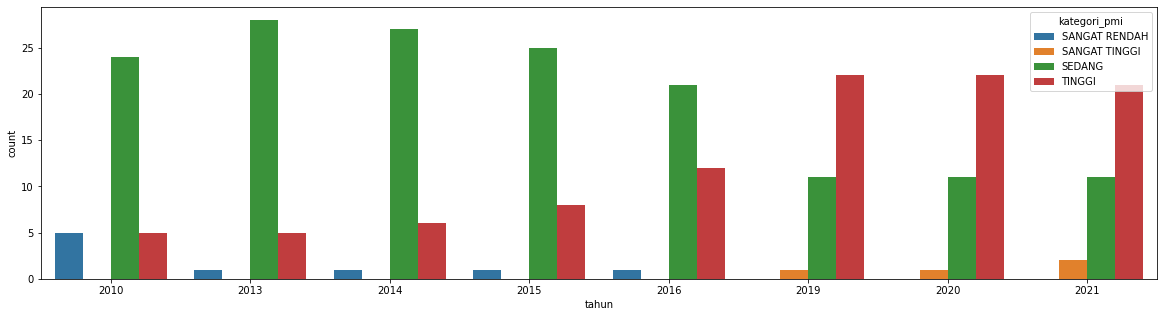

In [12]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="tahun", hue="kategori_pmi", data=df2)


<AxesSubplot:xlabel='count', ylabel='prov'>

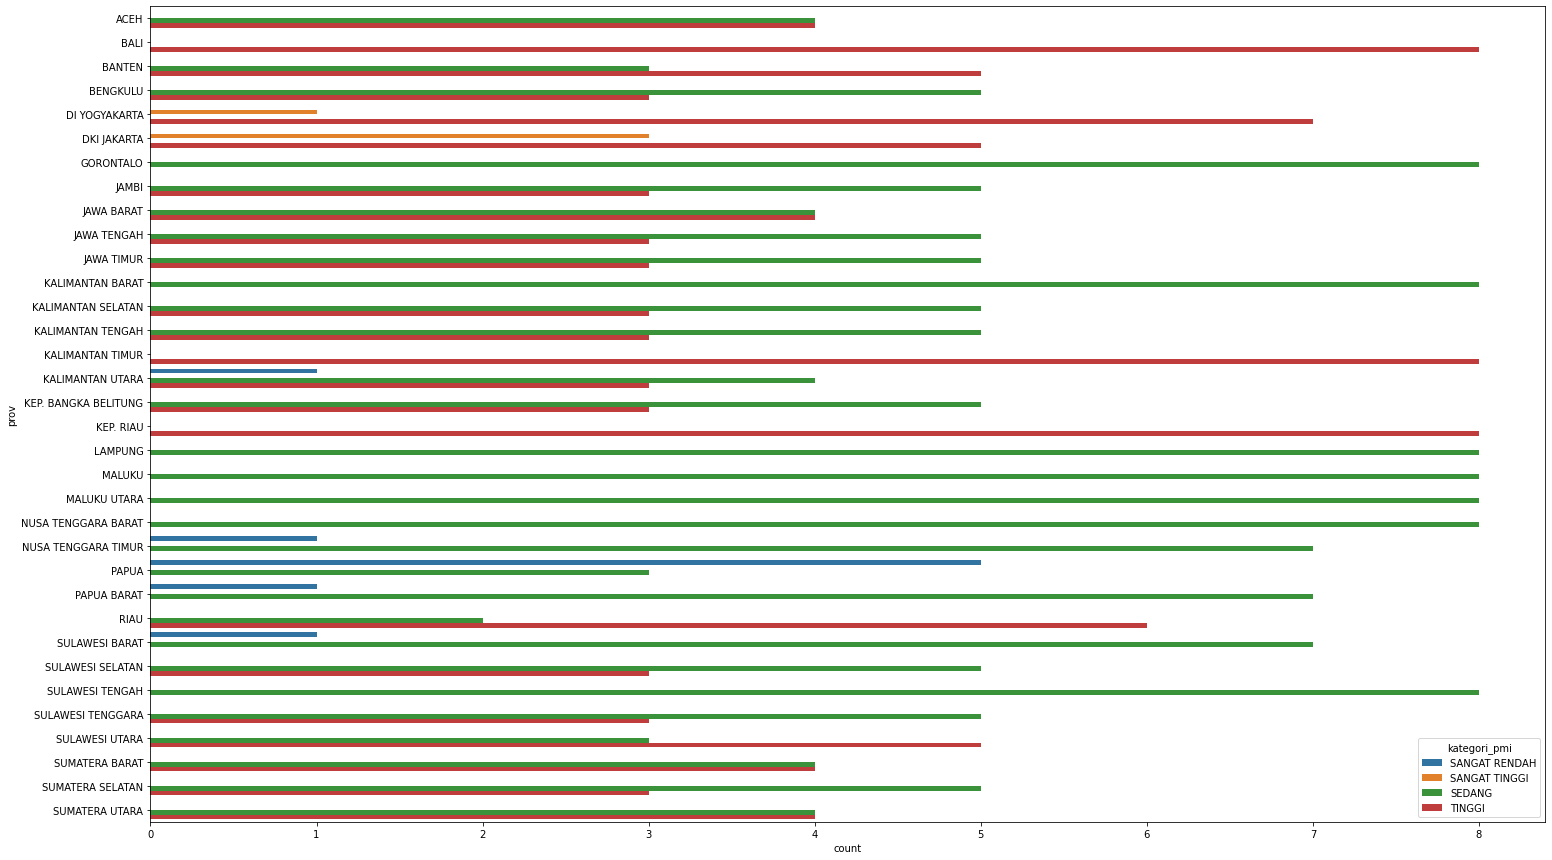

In [13]:
fig, ax = plt.subplots(figsize=(25, 15)) #atur ukuran chart
sns.countplot(ax=ax, y="prov",hue="kategori_pmi", data=df2)


## Pembuatan Model

In [14]:
# Creeted df_train
df_train = df2.drop(['tahun', 'prov'],axis=1)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 34 to 441
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kategori_pmi        272 non-null    category
 1   kepadatan_penduduk  272 non-null    category
dtypes: category(2)
memory usage: 8.6 KB


In [16]:
# Dummies
df_train = pd.get_dummies(data=df_train, columns=['kategori_pmi','kepadatan_penduduk'])

In [17]:
# penentuan target
# le = preprocessing.LabelEncoder()
# le.fit(df_train.kategori_pmi)
# Y = le.transform(df_train.kategori_pmi)

In [18]:
# df_train.kategori_pmi.value_counts()

In [19]:
# # Pickle
# with open ('C:\\Users\\Azzahra Fahriza\\Documents\\SEMESTER 3\\Data Mining\\uas\\dataset\\data.pickle', 'rb') as fp:
#  X_train_column = list(pickle.load(fp))
 
# df_prediksi2 = df_train[X_train_column]


In [20]:

# Split dataset
X_train,X_test,Y_train,Y_test=train_test_split(df_train,df_train,test_size=0.2,random_state=123)

In [21]:
# m_scaler = preprocessing.MinMaxScaler()
# X_train_minmax = mm_scaler.fit_transform(X_train)
# X_test_minmax = mm_scaler.transform(X_test)

In [22]:
#  Modeling
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.34545454545454546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        14
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

C:\Users\Azzahra Fahriza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Azzahra Fahriza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
